finished initialization
13.877433010414684


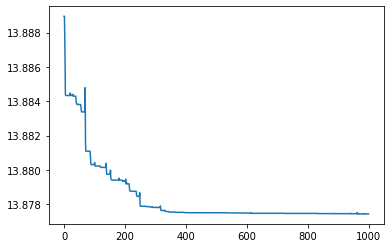

In [3]:
from parser import parse_config, data_converter, sample_set
from matplotlib import pyplot as plt

import numpy as np

from optimized_autoencoder import OptimizedAutoencoder

def compare_optimizer():
    base_output_path = "output/optimizer/"
    config_json = parse_config("resources/config.json")

    training_set = list()
    
    #Parse and sample training data
    for i in config_json["font_numbers"]:
        labels, alphabet = data_converter("resources/fonts_" + str(i) + ".txt")
        alphabet = np.array(alphabet)
        flattened_input = np.array(list(map(lambda char: np.array(char).flatten(), alphabet)))
        # if training_set is None:
        #     training_set = flattened_input
        # else:
        training_set.extend(sample_set(flattened_input, config_json["training_sample"]))
        # testing_set.append(list(zip(labels, flattened_input)))
    
    latent_dimension = 2
    update_frequency = 0
    execution_count = 5
    input_dimension = len(training_set[0])
    activation_function = (lambda x: 1/(1+np.exp(-2*x)))
    activation_derivative = (lambda x: 2*(1/(1+np.exp(-2*x)))*(1-(1/(1+np.exp(-2*x)))) )
    update_learn_rate=None
    architecture = config_json["architecture"]
    optimizer = config_json["optimizer"]
    learning_rate = config_json["learning_rate"]
    epoch_limit = config_json["epoch_limit"]

    optimized_autoencoder = OptimizedAutoencoder(optimizer, input_dimension, latent_dimension, architecture, activation_function)
    print("finished initialization")
    final_error, errors = optimized_autoencoder.train(training_set, training_set, epoch_limit)
    plt.plot(list(range(len(errors))), errors)
    print(final_error)

compare_optimizer()